<a href="https://colab.research.google.com/github/SifenTesfa/Disease-Detection/blob/main/Test_plant_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Test set Image Processing

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/lettucee/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 569 files belonging to 3 classes.
['Bacterial', 'fungal', 'healthy']


## Loading Model

In [ ]:
cnn = tf.keras.models.load_model('/content/drive/MyDrive/lettucee/trained_plant_disease_model.keras')

## Visualising and Performing Prediction on Single image

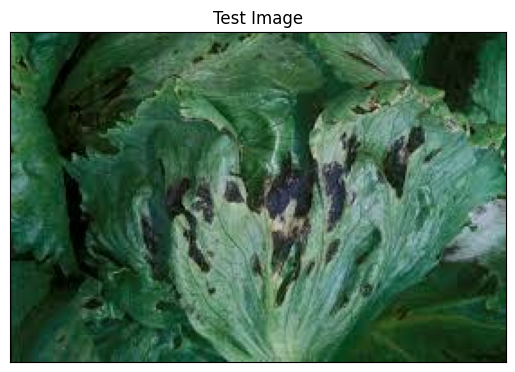

In [ ]:
#Test Image Visualization
import cv2
image_path = '/content/drive/MyDrive/lettucee/test/Bacterial/augmented_5.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [ ]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


In [ ]:
print(predictions)

[[9.9691617e-01 2.9834413e-03 1.0044916e-04]]


In [ ]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

0


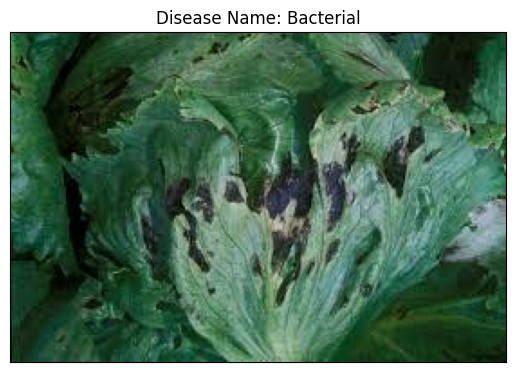

In [ ]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(cnn)
tflite_model = converter.convert()

Saved artifact at '/tmp/tmp_l2vp8q4'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='input_layer_3')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  132553783793568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132553792652736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132553783915824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132553783903328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132553783902448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132553783475216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132553783585152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132553783581280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132553783464480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132553783907904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1325537837999

In [ ]:
# Save the TFLite model to a file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model converted and saved as model.tflite")

Model converted and saved as model.tflite


In [ ]:
cd '/content/drive/MyDrive/lettuce'

/content/drive/MyDrive/lettuce


In [ ]:
from google.colab import files
files.download('model.tflite')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>